In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)
import numpy as np
from pycm import *

In [5]:
Results = pd.read_csv("ModelsCSV/Models.csv",converters={'CM_Train': pd.eval, 'CM_Test': pd.eval})
Results.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
New=Results["DataSetName"].str.split("_",expand=True).iloc[:,0:2]
New.columns=["Mel_number","Data_Size"]
Results = pd.concat([Results,New],axis=1)
Results.drop("DataSetName",axis=1,inplace=True)
Results["Data_Size"]=Results["Data_Size"].astype("int32")

In [18]:
Results.drop("train_acc_Best_Eb" , axis =1 , inplace=True)

# Over All Classes

In [19]:
g= sns.lineplot(x = "Data_Size", y = "train_acc_Best_Eb", data=Results, marker="o", label="Best Train Eboch")
sns.lineplot(x = "Data_Size", y = "vali_acc_Best_Eb", data=Results, marker="o", label="Best Validation Eboch")


g.set_xticks(Results.Data_Size.values) 

plt.ylabel("Accuracy")
plt.title("Train Vs Validation For best Eboch")
plt.show()

ValueError: Could not interpret value `train_acc_Best_Eb` for parameter `y`

In [34]:
Results

,Model_Path,vali_acc_Best_Eb,train_acc_All,test_acc_All,CM_Test,CM_Train,Mel_number,Data_Size
0,VGG_Mel128_200_M_NOP12085_83929,0.849338,0.937733,0.829611,"[194, 0, 0, 0, 0, 1, 7, 0, 168, 2, 0, 6, 13, 0...","[1634, 0, 0, 3, 0, 4, 17, 0, 1456, 5, 1, 6, 18...",Mel128,200
1,VGG_Mel128_200_M_P12085_82843,0.837748,0.917253,0.832920,"[179, 0, 1, 0, 0, 4, 18, 0, 140, 9, 8, 26, 5, ...","[1510, 2, 5, 4, 2, 12, 123, 0, 1207, 103, 1, 1...",Mel128,200
2,ResNet_Mel128_200_M_P12085_21924,0.920530,1.000000,0.911497,"[194, 0, 0, 0, 0, 1, 7, 0, 176, 3, 5, 4, 1, 0,...","[1658, 0, 0, 0, 0, 0, 0, 0, 1486, 0, 0, 0, 0, ...",Mel128,200
3,ResNet_Mel128_300_M_18730_9642,0.899225,0.999677,0.885659,"[278, 0, 1, 1, 0, 42, 0, 0, 250, 8, 5, 8, 0, 0...","[2476, 0, 0, 0, 0, 3, 0, 0, 2284, 0, 0, 0, 0, ...",Mel128,300


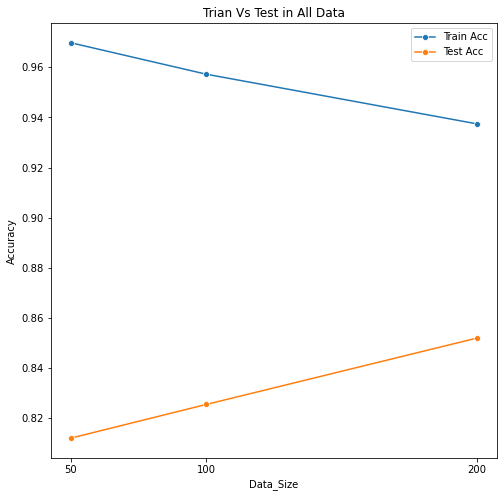

In [ ]:

g= sns.lineplot(x = "Data_Size", y = "train_acc_All", data=Results, marker="o", label="Train Acc")
sns.lineplot(x = "Data_Size", y = "test_acc_All", data=Results, marker="o", label="Test Acc")


g.set_xticks(Results.Data_Size.values) 

plt.ylabel("Accuracy")
plt.title("Trian Vs Test in All Data")
plt.show()

## Calcaulte Metrics for Each class

In [20]:
classes = [(0, 'ar'), (1, 'de'), (2, 'en'), (3, 'es'), (4, 'fr'), (5, 'it'), (6, 'pt')]

In [21]:
classes = ['ar','de', 'en','es', 'fr', 'it','pt' ]

In [22]:
CM= np.array(Results.loc[0,"CM_Test"]).reshape((7,7)).astype("int32")

In [23]:
cm = ConfusionMatrix(matrix=CM)

c:\Users\mm\anaconda3\lib\site-packages\pycm\pycm_class_func.py:290: RuntimeWarning: overflow encountered in long_scalars
  (math.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)))
c:\Users\mm\anaconda3\lib\site-packages\pycm\pycm_overall_func.py:333: RuntimeWarning: overflow encountered in long_scalars
  return cov_x_y / (math.sqrt(cov_y_y * cov_x_x))


Data_Size : 200  ModelName : VGG_Mel128_200_M_NOP12085_83929 
    
for class 0: recall 0.9604, specificity 0.9722            precision 0.8739, f1 0.9151
for class 1: recall 0.8889, specificity 0.9549            precision 0.785, f1 0.8337
for class 2: recall 0.6081, specificity 0.9934            precision 0.9278, f1 0.7347
for class 3: recall 0.8354, specificity 0.977            precision 0.8509, f1 0.8431
for class 4: recall 0.7661, specificity 0.975            precision 0.8344, f1 0.7988
for class 5: recall 0.8963, specificity 0.9368            precision 0.6901, f1 0.7798
for class 6: recall 0.7953, specificity 0.9913            precision 0.9379, f1 0.8608

___________________________________________

Data_Size : 200  ModelName : VGG_Mel128_200_M_P12085_82843 
    
for class 0: recall 0.9604, specificity 0.9722            precision 0.8739, f1 0.9151
for class 1: recall 0.8889, specificity 0.9549            precision 0.785, f1 0.8337
for class 2: recall 0.6081, specificity 0.9934      

C:\Users\mm\AppData\Local\Temp\ipykernel_9240\1243147512.py:14: RuntimeWarning: invalid value encountered in long_scalars
  recall = tp/(tp+fn)
C:\Users\mm\AppData\Local\Temp\ipykernel_9240\1243147512.py:15: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp/(tp+fp)


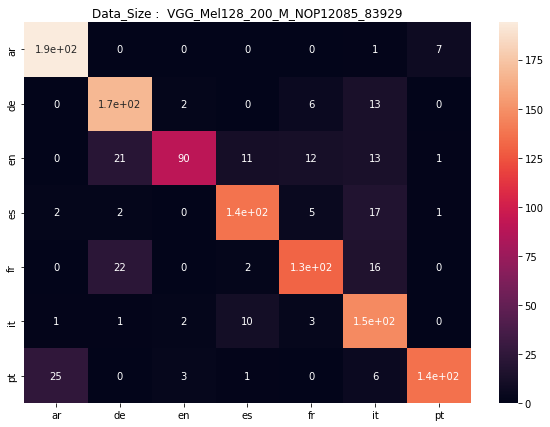

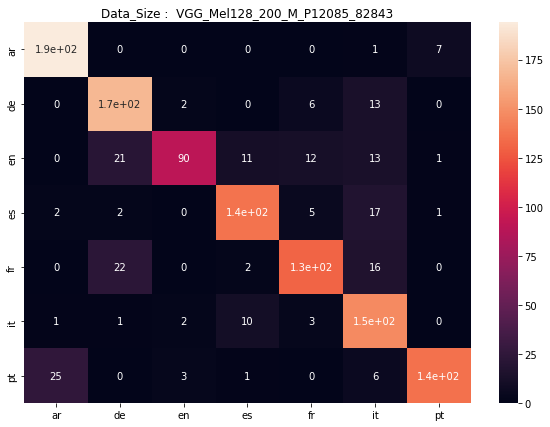

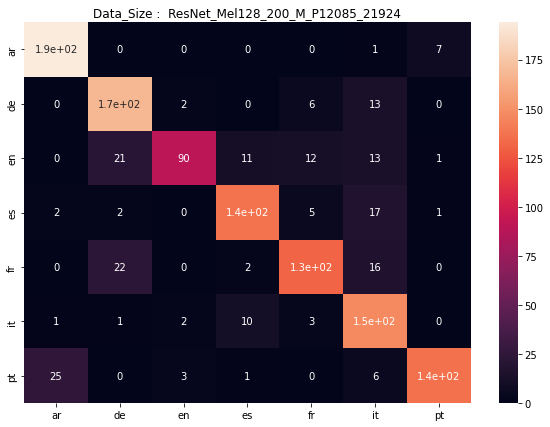

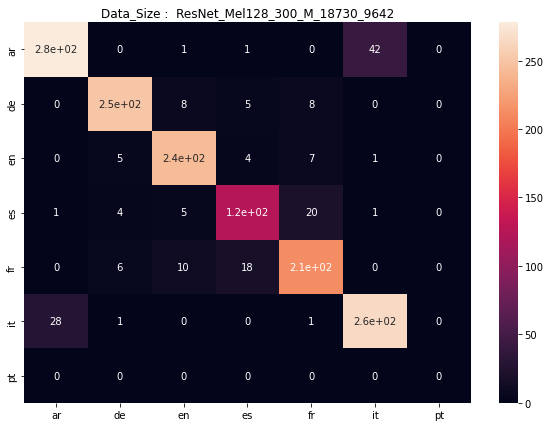

In [30]:
n_classes=6
ds= []

for i , Size in enumerate (Results["Data_Size"].values):
    print(f"Data_Size : {Size}  ModelName : {Results.loc[i,'Model_Path']} " )
    print("    ")
    cm = np.array(Results.loc[Results["Data_Size"]==Size,"CM_Test"])[0].reshape((7,7)).astype("int32")
    for c in range(n_classes+1):
        tp = cm[c,c]
        fp = sum(cm[:,c]) - cm[c,c]
        fn = sum(cm[c,:]) - cm[c,c]
        tn = sum(np.delete(sum(cm)-cm[c,:],c))

        recall = tp/(tp+fn)
        precision = tp/(tp+fp)
        specificity = tn/(tn+fp)
        f1_score = 2*((precision*recall)/(precision+recall))
        

        #print(f"for class {c}: acc {accuracy}, recall {recall},\
        #      precision {precision}, f1 {f1_score}")
        print("for class {}: recall {}, specificity {}\
            precision {}, f1 {}".format(c,round(recall,4), round(specificity,4), round(precision,4),round(f1_score,4)))


        ds.append([Results.loc[i,'Model_Path'],Size, classes[c], recall, specificity, precision, f1_score  ])
    
    print("")
    print("___________________________________________")
    print("")

    df_cm = pd.DataFrame(cm, index = [i for i in classes],
                  columns = [i for i in classes])
    plt.figure(figsize = (10,7))
    plt.title(f"Data_Size :  {Results.loc[i,'Model_Path']}")
    sns.heatmap(df_cm, annot=True)

df_df= pd.DataFrame(ds,columns = ["Model_Name","Data_size","Lang","recall","specificity","precision","f1_score"])

In [32]:
df_df[14:]

,Model_Name,Data_size,Lang,recall,specificity,precision,f1_score
14,ResNet_Mel128_200_M_P12085_21924,200,ar,0.960396,0.972195,0.873874,0.915094
15,ResNet_Mel128_200_M_P12085_21924,200,de,0.888889,0.954902,0.785047,0.833747
16,ResNet_Mel128_200_M_P12085_21924,200,en,0.608108,0.993402,0.927835,0.734694
17,ResNet_Mel128_200_M_P12085_21924,200,es,0.835366,0.977033,0.850932,0.843077
18,ResNet_Mel128_200_M_P12085_21924,200,fr,0.766082,0.974952,0.834395,0.798780
19,ResNet_Mel128_200_M_P12085_21924,200,it,0.896341,0.936842,0.690141,0.779841
20,ResNet_Mel128_200_M_P12085_21924,200,pt,0.795322,0.991329,0.937931,0.860759
21,ResNet_Mel128_300_M_18730_9642,300,ar,0.863354,0.976346,0.905537,0.883943
22,ResNet_Mel128_300_M_18730_9642,300,de,0.922509,0.987471,0.939850,0.931099
23,ResNet_Mel128_300_M_18730_9642,300,en,0.934615,0.981366,0.910112,0.922201


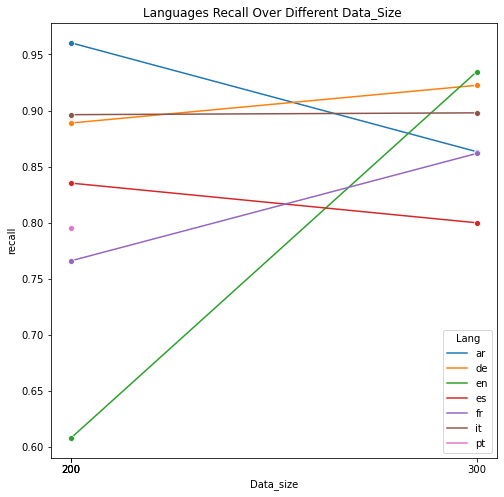

In [33]:
g= sns.lineplot(x = "Data_size", y = "recall", data=df_df, marker="o", hue="Lang")


g.set_xticks(Results.Data_Size.values) 

plt.ylabel("recall")
plt.title("Languages Recall Over Different Data_Size ")
plt.show()

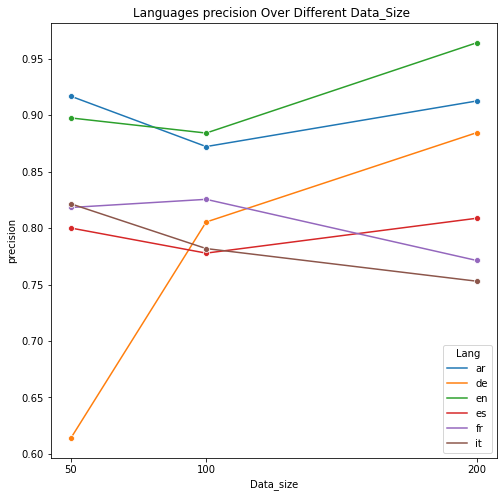

In [236]:
g= sns.lineplot(x = "Data_size", y = "precision", data=df_df, marker="o", hue="Lang")


g.set_xticks(Results.Data_Size.values) 

plt.ylabel("precision")
plt.title("Languages precision Over Different Data_Size ")
plt.show()

In [6]:
Test =  [59,62,67]
Train = [89,80,78]
DataSize = [50,100,200]
TestdsDf = pd.DataFrame({"Test" : Test,"Train" : Train,"DataSize" : DataSize})

In [7]:
TestdsDf

,Test,Train,DataSize
0,59,89,50
1,62,80,100
2,67,78,200


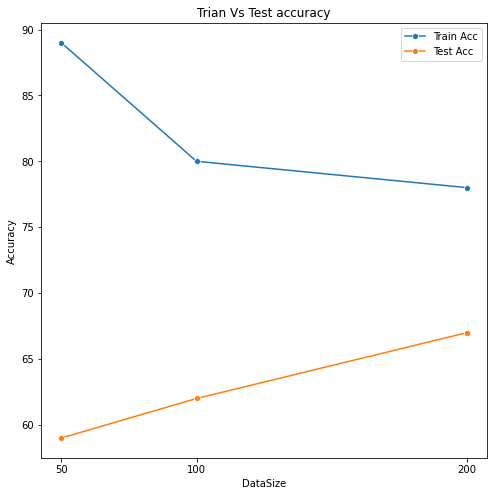

In [11]:

g= sns.lineplot(x = "DataSize", y = "Train", data=TestdsDf, marker="o", label="Train Acc")
sns.lineplot(x = "DataSize", y = "Test", data=TestdsDf, marker="o", label="Test Acc")


g.set_xticks(TestdsDf.DataSize.values) 

plt.ylabel("Accuracy")
plt.title("Trian Vs Test accuracy")
plt.show()